# Dectect & Remove Outliers

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [68]:
df=pd.read_csv('weight-height.csv')

In [69]:
df.shape

(10000, 3)

In [70]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\user\AppData\Local\Temp\ipykernel_15732\1175009346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


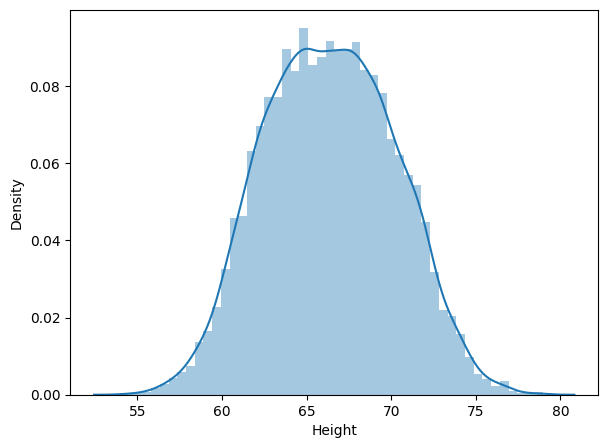

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15732\2490020169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


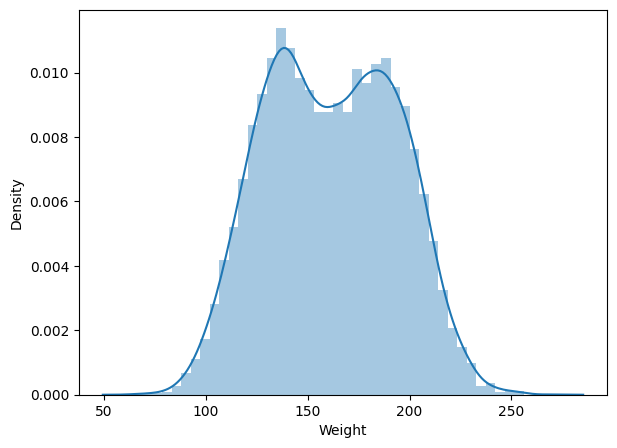

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(df['Weight'])

plt.show()

<Axes: ylabel='Height'>

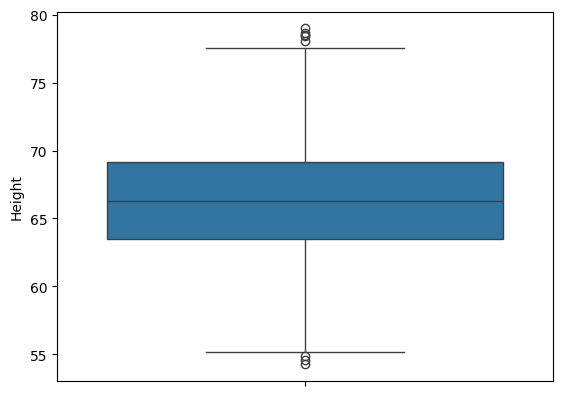

In [75]:
# to see outliers 
sns.boxplot(df['Height'])

<Axes: ylabel='Weight'>

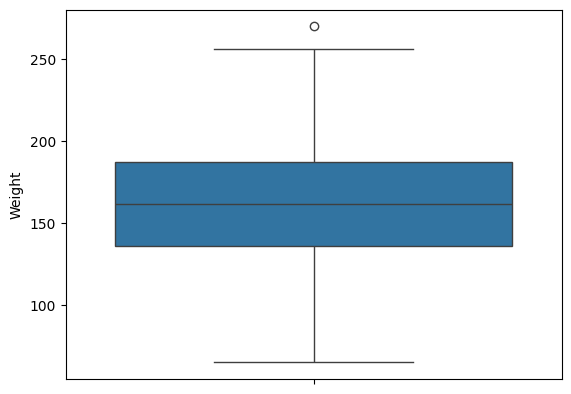

In [76]:
sns.boxplot(df['Weight'])

In [82]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [83]:
# finding the boundaries
print("Highest allowed",df['Height'].mean()+3*df['Height'].std())
print("Lowest allowed",df['Height'].mean()-3*df['Height'].std())

Highest allowed 77.91014411714093
Lowest allowed 54.82497539250156


In [88]:
# finding outliers
df[(df['Height'] > 77.9)  | (df['Height'] < 54.8)]



,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


# Trimming

In [90]:
new_df=df[(df['Height']< 77.9) & (df['Height']> 54.8)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Z-score method

In [91]:
# calculating Z-score
df['Height_zscore']=(df['Height']-df['Height'].mean())/df['Height'].std()

In [92]:
df.head()

,Gender,Height,Weight,Height_zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [98]:
df[df['Height_zscore']>3]

,Gender,Height,Weight,Height_zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [99]:
df[df['Height_zscore']< -3]

,Gender,Height,Weight,Height_zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [103]:
df[(df['Height_zscore']>3) | (df['Height_zscore']< -3)]

,Gender,Height,Weight,Height_zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [104]:
# Trimming
new_df=df[(df['Height_zscore']<3)& (df['Height_zscore']> -3)]

In [105]:
new_df

,Gender,Height,Weight,Height_zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


# Capping

In [106]:
upper_limit = df['Height'].mean() +3*df['Height'].std()
lower_limit = df['Height'].mean() -3*df['Height'].std()

In [107]:
upper_limit

77.91014411714093

In [109]:
lower_limit

54.82497539250156

In [110]:
df['Height']=np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

In [116]:
df.shape

(10000, 4)

In [117]:
df['Height'].describe()

count    10000.000000
mean        66.367321
std          3.846314
min         54.824975
25%         63.505620
50%         66.318070
75%         69.174262
max         77.910144
Name: Height, dtype: float64